In [1]:
# mapped the FIG faa to NCBI faa by local blastp
# reciprocal best hit, with percent identity with local blastp
# followed this: https://widdowquinn.github.io/2018-03-06-ibioic/02-sequence_databases/05-blast_for_rbh.html
# ./blastp -query ~/Documents/180530_Vnat_CRISPRi_media/seqonly/uniq/vnat.faa  -db ../data/vnat_NCBI.aa -outfmt "6 qseqid sseqid pident qcovs qlen slen length bitscore evalue"  -max_target_seqs 1 > ~/Documents/180530_Vnat_CRISPRi_media/seqonly/uniq/FIG_NCBI_blastp.tab
# ./blastp -query ~/Documents/180530_Vnat_CRISPRi_media/seqonly/uniq/vnat_NCBI.faa  -db ../data/vnat_FIG.aa -outfmt "6 qseqid sseqid pident qcovs qlen slen length bitscore evalue" -max_target_seqs 1 > ~/Documents/180530_Vnat_CRISPRi_media/seqonly/uniq/NCBI_FIG_blastp.tab

# in the following directory: /Users/henry/Geneious 11.1 Data/BLAST/bin
# ./blastp -query ~/Documents/180530_Vnat_CRISPRi_media/seqonly/uniq/vnat.faa  -db ../data/vnat_Weinstock.aa -outfmt "6 qseqid sseqid pident qcovs qlen slen length bitscore evalue"  -max_target_seqs 1 > ~/Documents/180530_Vnat_CRISPRi_media/seqonly/uniq/FIG_Weinstock_blastp.tab
# ./blastp -query ~/Documents/180530_Vnat_CRISPRi_media/seqonly/uniq/vnat_Weinstock.faa  -db ../data/vnat_FIG.aa -outfmt "6 qseqid sseqid pident qcovs qlen slen length bitscore evalue"  -max_target_seqs 1 > ~/Documents/180530_Vnat_CRISPRi_media/seqonly/uniq/Weinstock_FIG_blastp.tab


%matplotlib inline  
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_color_codes("bright")
# sns.set()
import glob
# import scipy
from pylab import rcParams
from matplotlib.colors import LogNorm


pd.set_option('max_columns', 160)
pd.set_option('max_rows', 100)


In [2]:
fwd_results = pd.read_csv("FIG_Weinstock_blastp.tab",sep = '\t', names = ["query", "subject", "identity", "coverage", "qlength", "slength", "alength", "bitscore", "E-value"])
rev_results = pd.read_csv("Weinstock_FIG_blastp.tab",sep = '\t', names= ["query", "subject", "identity", "coverage", "qlength", "slength", "alength", "bitscore", "E-value"])

# Create a new column in both dataframes: normalised bitscore
fwd_results['norm_bitscore'] = fwd_results.bitscore/fwd_results.qlength
rev_results['norm_bitscore'] = rev_results.bitscore/rev_results.qlength

# Create query and subject coverage columns in both dataframes
fwd_results['qcov'] = fwd_results.alength/fwd_results.qlength
rev_results['qcov'] = rev_results.alength/rev_results.qlength
fwd_results['scov'] = fwd_results.alength/fwd_results.slength
rev_results['scov'] = rev_results.alength/rev_results.slength

# Clip maximum coverage values at 1.0
fwd_results['qcov'] = fwd_results['qcov'].clip_upper(1)
rev_results['qcov'] = rev_results['qcov'].clip_upper(1)
fwd_results['scov'] = fwd_results['scov'].clip_upper(1)
rev_results['scov'] = rev_results['scov'].clip_upper(1)

In [3]:
rev_results.head(5)

,query,subject,identity,coverage,qlength,slength,alength,bitscore,E-value,norm_bitscore,qcov,scov
0,lcl|NZ_CP016345.1_prot_WP_014230422.1_1,FIG|691.12.PEG.2583,99.782,98,468,459,459,946.0,0.000000e+00,2.021368,0.980769,1.0
1,lcl|NZ_CP016345.1_prot_WP_014230423.1_2,FIG|691.12.PEG.2582,100.000,100,366,366,366,745.0,0.000000e+00,2.035519,1.000000,1.0
2,lcl|NZ_CP016345.1_prot_WP_020333577.1_3,FIG|691.12.PEG.2581,100.000,100,359,359,359,747.0,0.000000e+00,2.080780,1.000000,1.0
3,lcl|NZ_CP016345.1_prot_WP_020333578.1_4,FIG|691.12.PEG.2580,100.000,100,805,805,805,1673.0,0.000000e+00,2.078261,1.000000,1.0
4,lcl|NZ_CP016345.1_prot_WP_020333579.1_5,FIG|691.12.PEG.2579,100.000,100,145,145,145,296.0,1.890000e-106,2.041379,1.000000,1.0


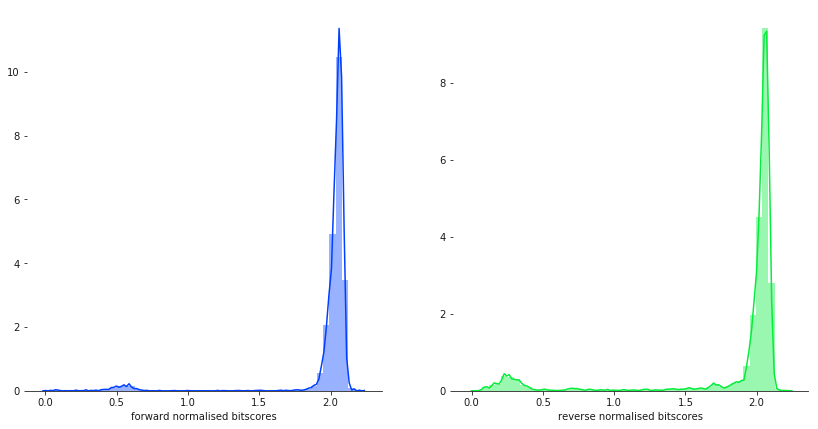

In [4]:
# Set up the figure
f, axes = plt.subplots(1, 2, figsize=(14, 7), sharex=True)
sns.despine(left=True)

# Plot distribution of forward and reverse hit bitscores
sns.distplot(fwd_results.norm_bitscore, color="b", ax=axes[0], axlabel="forward normalised bitscores")
sns.distplot(rev_results.norm_bitscore, color="g", ax=axes[1], axlabel="reverse normalised bitscores");


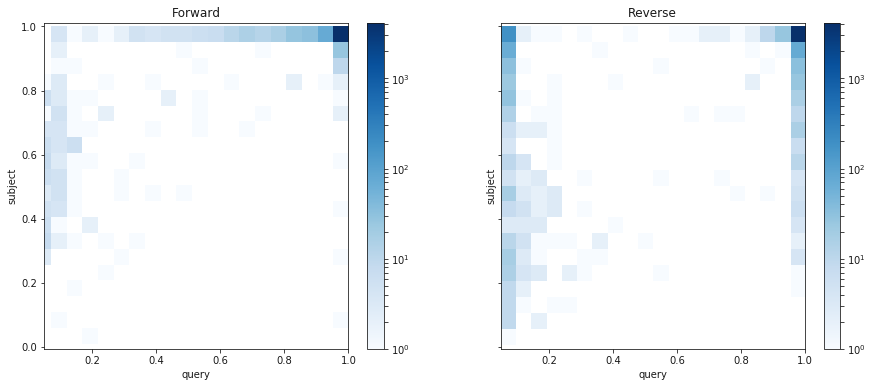

In [5]:
# Plot 2D density histograms

# Calculate 2D density histograms for counts of matches at several coverage levels
(Hfwd, xedgesf, yedgesf) = np.histogram2d(fwd_results.qcov, fwd_results.scov, bins=20)
(Hrev, xedgesr, yedgesr) = np.histogram2d(rev_results.qcov, rev_results.scov, bins=20)

# Create a 1x2 figure array
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharex=True, sharey=True)

# Plot histogram for forward matches
im = axes[0].imshow(Hfwd, cmap=plt.cm.Blues, norm=LogNorm(),
                    extent=[xedgesf[0], xedgesf[-1], yedgesf[0], yedgesf[-1]],
                    origin='lower', aspect=1)
axes[0].set_title("Forward")
axes[0].set_xlabel("query")
axes[0].set_ylabel("subject")

# Plot histogram for reverse matches
im = axes[1].imshow(Hrev, cmap=plt.cm.Blues, norm=LogNorm(),
                    extent=[xedgesr[0], xedgesr[-1], yedgesr[0], yedgesr[-1]],
                    origin='lower', aspect=1)
axes[1].set_title("Reverse")
axes[1].set_xlabel("query")
axes[1].set_ylabel("subject")

# Add colourbars
fig.colorbar(im, ax=axes[0])
fig.colorbar(im, ax=axes[1]);

In [6]:
rev_results.head(5)

,query,subject,identity,coverage,qlength,slength,alength,bitscore,E-value,norm_bitscore,qcov,scov
0,lcl|NZ_CP016345.1_prot_WP_014230422.1_1,FIG|691.12.PEG.2583,99.782,98,468,459,459,946.0,0.000000e+00,2.021368,0.980769,1.0
1,lcl|NZ_CP016345.1_prot_WP_014230423.1_2,FIG|691.12.PEG.2582,100.000,100,366,366,366,745.0,0.000000e+00,2.035519,1.000000,1.0
2,lcl|NZ_CP016345.1_prot_WP_020333577.1_3,FIG|691.12.PEG.2581,100.000,100,359,359,359,747.0,0.000000e+00,2.080780,1.000000,1.0
3,lcl|NZ_CP016345.1_prot_WP_020333578.1_4,FIG|691.12.PEG.2580,100.000,100,805,805,805,1673.0,0.000000e+00,2.078261,1.000000,1.0
4,lcl|NZ_CP016345.1_prot_WP_020333579.1_5,FIG|691.12.PEG.2579,100.000,100,145,145,145,296.0,1.890000e-106,2.041379,1.000000,1.0


In [29]:
# Merge forward and reverse results
rbbh = pd.merge(fwd_results, rev_results[['query', 'subject']],
                left_on='subject', right_on='query',
                how='outer')

# Discard rows that are not RBH
rbbh = rbbh.loc[rbbh.query_x == rbbh.subject_y]

# Group duplicate RBH rows, taking the maximum value in each column
rbbh = rbbh.groupby(['query_x', 'subject_x']).max()
rbbh.head(5)


,,identity,coverage,qlength,slength,alength,bitscore,E-value,norm_bitscore,qcov,scov,query_y,subject_y
query_x,subject_x,,,,,,,,,,,,
FIG|691.12.PEG.1,lcl|NZ_CP016345.1_prot_WP_020334021.1_2731,100.0,100.0,446.0,446.0,446.0,922.0,0.000000e+00,2.067265,1.000000,1.0,lcl|NZ_CP016345.1_prot_WP_020334021.1_2731,FIG|691.12.PEG.1
FIG|691.12.PEG.10,lcl|NZ_CP016345.1_prot_WP_014233286.1_2722,100.0,100.0,233.0,233.0,233.0,466.0,1.160000e-170,2.000000,1.000000,1.0,lcl|NZ_CP016345.1_prot_WP_014233286.1_2722,FIG|691.12.PEG.10
FIG|691.12.PEG.100,lcl|NZ_CP016345.1_prot_WP_014233055.1_2476,100.0,99.0,150.0,149.0,149.0,313.0,7.140000e-113,2.086667,0.993333,1.0,lcl|NZ_CP016345.1_prot_WP_014233055.1_2476,FIG|691.12.PEG.100
FIG|691.12.PEG.1000,lcl|NZ_CP016345.1_prot_WP_020336352.1_1583,100.0,100.0,326.0,326.0,326.0,665.0,0.000000e+00,2.039877,1.000000,1.0,lcl|NZ_CP016345.1_prot_WP_020336352.1_1583,FIG|691.12.PEG.1000
FIG|691.12.PEG.1001,lcl|NZ_CP016345.1_prot_WP_020336351.1_1582,100.0,100.0,471.0,471.0,471.0,954.0,0.000000e+00,2.025478,1.000000,1.0,lcl|NZ_CP016345.1_prot_WP_020336351.1_1582,FIG|691.12.PEG.1001


In [66]:
rbbh_slim = rbbh[["query_y","subject_y"]].reset_index()
rbbh_slim = rbbh_slim[["query_y","subject_y"]]
rbbh_slim.head(5)

,query_y,subject_y
0,lcl|NZ_CP016345.1_prot_WP_020334021.1_2731,FIG|691.12.PEG.1
1,lcl|NZ_CP016345.1_prot_WP_014233286.1_2722,FIG|691.12.PEG.10
2,lcl|NZ_CP016345.1_prot_WP_014233055.1_2476,FIG|691.12.PEG.100
3,lcl|NZ_CP016345.1_prot_WP_020336352.1_1583,FIG|691.12.PEG.1000
4,lcl|NZ_CP016345.1_prot_WP_020336351.1_1582,FIG|691.12.PEG.1001


In [61]:
# rbbh_slim[rbbh_slim["query_y"]=='lcl|NZ_CP016345.1_prot_WP_014230422.1_1']

,query_y,subject_y
1710,lcl|NZ_CP016345.1_prot_WP_014230422.1_1,FIG|691.12.PEG.2583


In [109]:
# FASTA file descriptors from NCBI are here: vnat_NCBI_descriptors.txt
descriptor_filename = 'weinstock_descriptors.txt'
descriptor_file = open(descriptor_filename,'r')

mapping_by_proteinID = {}

for line in descriptor_file.readlines():
    entries = line.split('@')
    for entry in entries:
        if entry.startswith('>'):
            entry_tag = entry.replace('>','')
            entry_tag = entry_tag.rstrip()
        elif 'locus_tag=' in entry:
            curr = entry.split('=')
            curr_locustag = curr[1]
            curr_locustag = curr_locustag.rstrip()
#         elif 'gbkey=' in entry:
#             curr = entry.split('=')
#             curr_gbkey = curr[1]
#     print(entry_tag,curr_locustag)
    mapping_by_proteinID[entry_tag] = [curr_locustag]
# chkstr = "lcl|NZ_CP016345.1_prot_WP_020334021.1_2731"
# print(mapping_by_proteinID[chkstr])
# print(mapping_by_proteinID)
mapping_proteinID = pd.DataFrame.from_dict(mapping_by_proteinID, orient='index')
mapping_proteinID.reset_index(inplace=True)
mapping_proteinID.rename(index=str, columns={"index": "tag", 0: "locus_tag"}, inplace=True)

# mapping_proteinID  



In [110]:
rbbh_slim.head(2)

,query_y,subject_y
0,lcl|NZ_CP016345.1_prot_WP_020334021.1_2731,FIG|691.12.PEG.1
1,lcl|NZ_CP016345.1_prot_WP_014233286.1_2722,FIG|691.12.PEG.10


In [111]:
mapping_proteinID[mapping_proteinID["tag"]=="lcl|NZ_CP016345.1_prot_WP_020334021.1_2731"]

,tag,locus_tag
2730,lcl|NZ_CP016345.1_prot_WP_020334021.1_2731,BA890_RS14100


In [112]:
FIG_to_locustag = pd.merge(rbbh_slim,mapping_proteinID,
                           left_on="query_y",right_on="tag")
FIG_to_locustag.head(5)

,query_y,subject_y,tag,locus_tag
0,lcl|NZ_CP016345.1_prot_WP_020334021.1_2731,FIG|691.12.PEG.1,lcl|NZ_CP016345.1_prot_WP_020334021.1_2731,BA890_RS14100
1,lcl|NZ_CP016345.1_prot_WP_014233286.1_2722,FIG|691.12.PEG.10,lcl|NZ_CP016345.1_prot_WP_014233286.1_2722,BA890_RS14035
2,lcl|NZ_CP016345.1_prot_WP_014233055.1_2476,FIG|691.12.PEG.100,lcl|NZ_CP016345.1_prot_WP_014233055.1_2476,BA890_RS12670
3,lcl|NZ_CP016345.1_prot_WP_020336352.1_1583,FIG|691.12.PEG.1000,lcl|NZ_CP016345.1_prot_WP_020336352.1_1583,BA890_RS08095
4,lcl|NZ_CP016345.1_prot_WP_020336351.1_1582,FIG|691.12.PEG.1001,lcl|NZ_CP016345.1_prot_WP_020336351.1_1582,BA890_RS08090


In [113]:
FIG_to_Weinstock = FIG_to_locustag[["subject_y","locus_tag"]]
FIG_to_Weinstock.rename(index=str, columns={"subject_y": "FIG", "locus_tag": "Weinstock"}, inplace=True)
FIG_to_Weinstock.to_csv("FIG_to_Weinstock.csv",sep=";")
FIG_to_Weinstock.head(5)


/usr/local/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,FIG,Weinstock
0,FIG|691.12.PEG.1,BA890_RS14100
1,FIG|691.12.PEG.10,BA890_RS14035
2,FIG|691.12.PEG.100,BA890_RS12670
3,FIG|691.12.PEG.1000,BA890_RS08095
4,FIG|691.12.PEG.1001,BA890_RS08090


In [132]:
FIG_to_Weinstock[FIG_to_Weinstock["Weinstock"]=='BA890_RS09375']

,FIG,Weinstock
4148,FIG|691.12.PEG.728,BA890_RS09375


In [108]:
FIG_to_Weinstock[FIG_to_Weinstock["FIG"]=='FIG|691.12.PEG.413']

,FIG,Weinstock
3374,FIG|691.12.PEG.413,BA890_RS10960


In [11]:
mapped_table = pd.merge(rbbh_results, mapping_proteinID, on='NCBI_protein_ID',how='outer')
mapped_table.head(5)
mapped_table[["e1","e2","e3","num"]]  = mapped_table['FIG'].str.split('.',expand=True)
mapped_table[['num']] = mapped_table[['num']].apply(pd.to_numeric)
mapped_table_sorted = mapped_table.sort_values("num",ascending=True).reset_index(drop=True)
mapped_table_sorted.head(5)

NameError: name 'rbbh_results' is not defined

In [160]:
FIG_to_NCBI_mapping = mapped_table_sorted[['FIG','NCBI_protein_ID','NCBI_chr','NCBI_locus','NCBI_protein_desc','NCBI_location']]
FIG_to_NCBI_mapping.to_csv('FIG_to_NCBI_mapping.csv',sep=',')
FIG_to_NCBI_mapping.head(5)

,FIG,NCBI_protein_ID,NCBI_chr,NCBI_locus,NCBI_protein_desc,NCBI_location
0,FIG|691.12.PEG.1,ALR14475.1,CP009977.1,PN96_00040,phosphatidylserine synthase,complement(6014..7354)
1,FIG|691.12.PEG.2,ALR14476.1,CP009977.1,PN96_00045,acyltransferase,complement(7450..7857)
2,FIG|691.12.PEG.3,ALR14477.1,CP009977.1,PN96_00050,UDP-N-acetylenolpyruvoylglucosamine reductase,7958..9001
3,FIG|691.12.PEG.4,ALR14478.1,CP009977.1,PN96_00055,biotin--,8998..9963
4,FIG|691.12.PEG.5,ALR14479.1,CP009977.1,PN96_00060,pantothenate kinase,complement(9973..10896)
